#**K-Means Algorithm :**

**FILE UPLOAD :**

In [2]:
from google.colab import files
file_uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [5]:
import pandas as pd
Data = pd.read_csv('Mall_Customers.csv')

**DATA TO DATA CONVERT :**

In [8]:
df = Data
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**SHAPE :**

In [10]:
df.shape

(200, 5)

In [11]:
X = df [["Annual Income (k$)","Spending Score (1-100)"]]

**SCALER :**

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

**ELBOW METHOD :**   - Finding Optimal K Values

In [30]:
from sklearn.cluster import KMeans

wcss = []                     # within - cluster sum of square

for k in range (1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)


**ELBOW POINT GRAPH :**

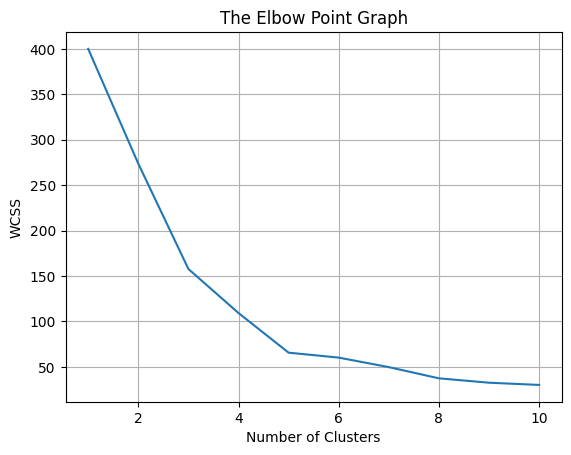

In [31]:
from matplotlib import pyplot as plt

plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [49]:
kmeans = KMeans(n_clusters=7, random_state=42)
Mod_cluster = kmeans.fit_predict(X_scaled)

df["Cluster"]=Mod_cluster
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


**SCATTER PLOT :**

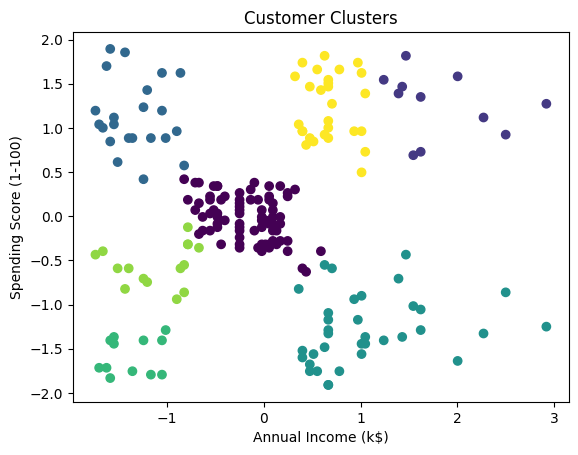

In [50]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=Mod_cluster)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters')
plt.show()